In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cấu hình hiển thị
plt.style.use("seaborn-v0_8-whitegrid")
sns.set(font_scale=1.1)
plt.rcParams["figure.figsize"] = (8,5)
df = pd.read_csv("moso_cleaned.csv")

print("✅ Dữ liệu đọc thành công!")
print(df.head(3))
print(df.info())

✅ Dữ liệu đọc thành công!
    Ngày đăng    Loại hình  Giá (VND)  Giá gốc (VND)  Diện tích  \
0  29/10/2025  alley_house   0.023937   4.080000e+09   0.035441   
1  29/10/2025  alley_house   0.030820   5.250000e+09   0.051296   
2  29/10/2025  alley_house   0.028761   4.900000e+09   0.077597   

   Diện tích gốc (m2) Giấy tờ pháp lý  Phòng ngủ  Phòng tắm  \
0                23.8     certificate        2.0        2.0   
1                32.3     certificate        2.0        2.0   
2                46.4           other        2.0        2.0   

  Tình trạng nội thất  
0         unfurnished  
1         unfurnished  
2         unfurnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ngày đăng            1803 non-null   object 
 1   Loại hình            1803 non-null   object 
 2   Giá (VND)            1803 non-null   float64

In [2]:
# ===============================
#  Giữ lại các cột quan trọng
# ===============================
cols = [
    "Giá gốc (VND)",
    "Diện tích gốc (m2)",
    "Phòng ngủ",
    "Phòng tắm",
    "Loại hình",
    "Giấy tờ pháp lý",
    "Tình trạng nội thất"
]

df = df[cols].dropna(subset=["Giá gốc (VND)", "Diện tích gốc (m2)"])

# Điền thiếu bằng trung vị
df["Phòng ngủ"].fillna(df["Phòng ngủ"].median(), inplace=True)
df["Phòng tắm"].fillna(df["Phòng tắm"].median(), inplace=True)

# ===============================
#  Mã hoá các biến phân loại
# ===============================
cat_cols = ["Loại hình", "Giấy tờ pháp lý", "Tình trạng nội thất"]
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# ===============================
# 5Chuẩn hoá dữ liệu đầu vào (X)
# ===============================
X = df[["Diện tích gốc (m2)", "Phòng ngủ", "Phòng tắm",
        "Loại hình", "Giấy tờ pháp lý", "Tình trạng nội thất"]]
y = df["Giá gốc (VND)"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Đã chuẩn bị dữ liệu cho mô hình.")

✅ Đã chuẩn bị dữ liệu cho mô hình.


C:\Users\nam\AppData\Local\Temp\ipykernel_9460\760668778.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Phòng ngủ"].fillna(df["Phòng ngủ"].median(), inplace=True)
C:\Users\nam\AppData\Local\Temp\ipykernel_9460\760668778.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


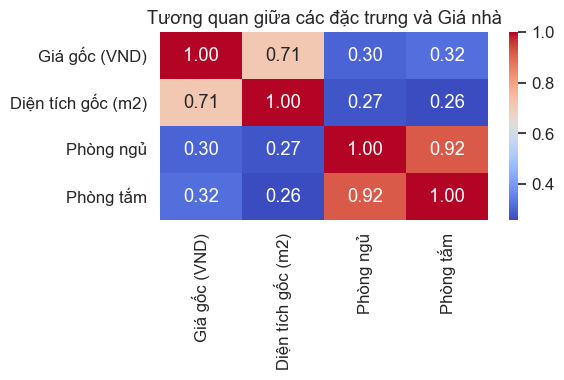

In [3]:
corr = df[["Giá gốc (VND)", "Diện tích gốc (m2)", "Phòng ngủ", "Phòng tắm"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Tương quan giữa các đặc trưng và Giá nhà")
plt.tight_layout()
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f" Tập huấn luyện: {len(X_train)} mẫu — Tập kiểm thử: {len(X_test)} mẫu")

 Tập huấn luyện: 1442 mẫu — Tập kiểm thử: 361 mẫu


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

print(" Đã huấn luyện xong mô hình Linear Regression.")


 Đã huấn luyện xong mô hình Linear Regression.


In [7]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=====  KẾT QUẢ MÔ HÌNH =====")
print(f" MAE:  {mae:,.0f} VND")
print(f" RMSE: {rmse:,.0f} VND")
print(f" R²:   {r2:.3f}")


=====  KẾT QUẢ MÔ HÌNH =====
 MAE:  4,423,327,947 VND
 RMSE: 6,318,869,432 VND
 R²:   0.462


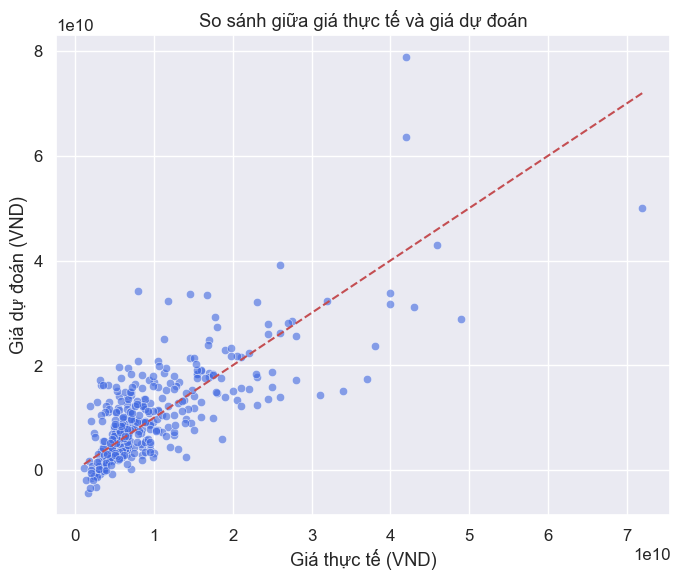

In [8]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="royalblue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Giá thực tế (VND)")
plt.ylabel("Giá dự đoán (VND)")
plt.title("So sánh giữa giá thực tế và giá dự đoán")
plt.tight_layout()
plt.show()

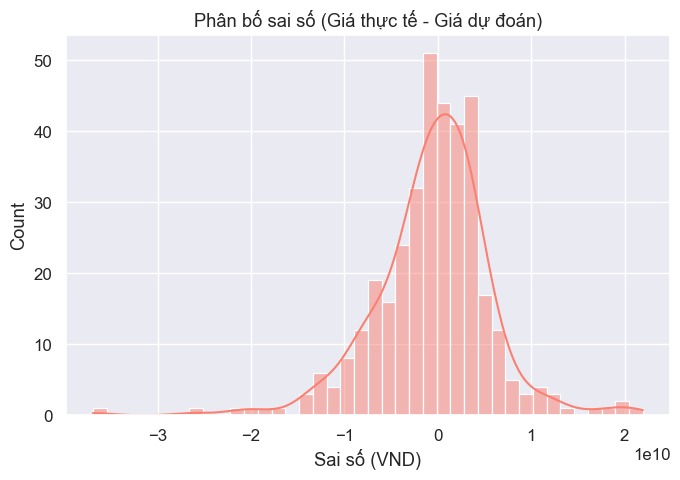

In [9]:
errors = y_test - y_pred
plt.figure(figsize=(7,5))
sns.histplot(errors, bins=40, kde=True, color="salmon")
plt.title("Phân bố sai số (Giá thực tế - Giá dự đoán)")
plt.xlabel("Sai số (VND)")
plt.tight_layout()
plt.show()

C:\Users\nam\AppData\Local\Temp\ipykernel_9460\3322821198.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Trọng số (Coefficient)", y="Đặc trưng", data=coef_df, palette="coolwarm")


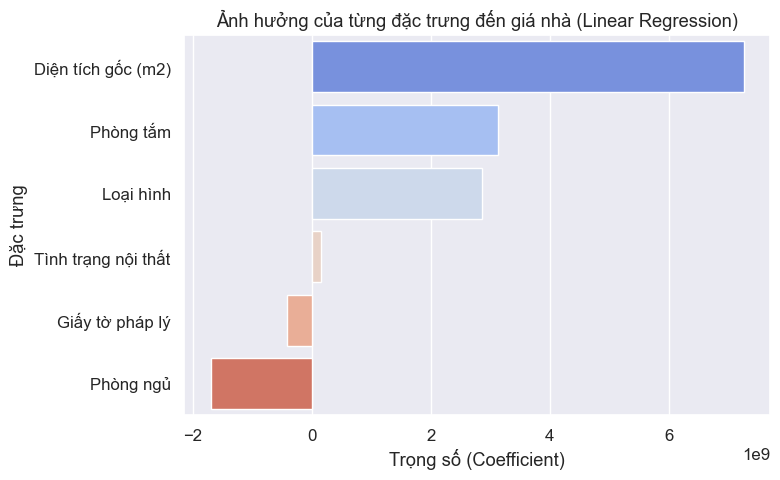

             Đặc trưng  Trọng số (Coefficient)
0   Diện tích gốc (m2)            7.261403e+09
2            Phòng tắm            3.130305e+09
3            Loại hình            2.858182e+09
5  Tình trạng nội thất            1.536045e+08
4      Giấy tờ pháp lý           -4.117749e+08
1            Phòng ngủ           -1.704927e+09


In [10]:
coef_df = pd.DataFrame({
    "Đặc trưng": X.columns,
    "Trọng số (Coefficient)": model.coef_
}).sort_values(by="Trọng số (Coefficient)", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Trọng số (Coefficient)", y="Đặc trưng", data=coef_df, palette="coolwarm")
plt.title("Ảnh hưởng của từng đặc trưng đến giá nhà (Linear Regression)")
plt.tight_layout()
plt.show()

print(coef_df)


In [11]:
# Giả sử ta muốn dự đoán căn nhà:
# - Diện tích: 85 m²
# - 2 phòng ngủ, 2 phòng tắm
# - Loại hình = 0 (Căn hộ), Giấy tờ = 1 (Sổ đỏ), Nội thất = 2 (Đầy đủ)
new_house = pd.DataFrame({
    "Diện tích gốc (m2)": [85],
    "Phòng ngủ": [2],
    "Phòng tắm": [2],
    "Loại hình": [1],
    "Giấy tờ pháp lý": [1],
    "Tình trạng nội thất": [2]
})

new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)

print(f" Giá dự đoán: {predicted_price[0]:,.0f} VND")


 Giá dự đoán: 11,540,596,707 VND


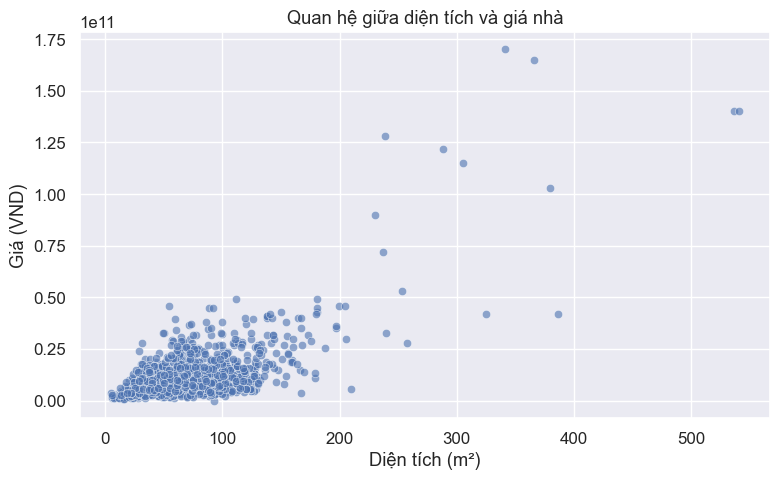

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Diện tích gốc (m2)"], y=df["Giá gốc (VND)"], alpha=0.6)
plt.title("Quan hệ giữa diện tích và giá nhà")
plt.xlabel("Diện tích (m²)")
plt.ylabel("Giá (VND)")
plt.tight_layout()
plt.show()